In [35]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, Y_train), (X_test, Y_test) = datasets. cifar10. load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
Y_train [:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
Y_train = Y_train. reshape(-1,)

In [11]:
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
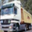

In [12]:
X_train[1]

In [13]:
classes =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
classes [1]

'automobile'

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
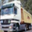

In [15]:
X_train [1]

In [16]:
Y_train [1]

9

In [20]:
def plot_sample(X, Y, index):
   plt.figure(figsize = (15,2))
   plt.imshow(X[index])
   plt.xlabel(classes [Y[index]])

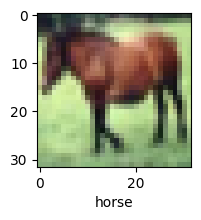

In [24]:
plot_sample(X_train, Y_train, 7)

In [25]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [26]:
X_train, X_test = X_train/255, X_test/255

In [27]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [33]:
cnn = models.Sequential([
   layers.Conv2D (filters=32, kernel_size=(3, 3), activation='relu', input_shape= (32, 32, 3)),
   layers.MaxPooling2D((2, 2)),

   layers.Conv2D (filters=64, kernel_size=(3, 3), activation= 'relu'),
   layers.MaxPooling2D((2, 2)),

   layers.Conv2D (filters=128, kernel_size=(3, 3), activation='relu'),
   layers.MaxPooling2D((2, 2)),

   layers.Flatten(),
   layers.Dense (64, activation='relu'),
   layers.Dense (10, activation='softmax' )
   ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
cnn.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [39]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.3483 - loss: 1.7625
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.5795 - loss: 1.1830
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6461 - loss: 1.0060
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6900 - loss: 0.8873
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7266 - loss: 0.7812
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7530 - loss: 0.7092
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7711 - loss: 0.6559
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.7935 - loss: 0.5917
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.8081 - loss: 0.5468
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.8270 - loss: 0.4970


In [41]:
cnn.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7236 - loss: 0.8865


[0.8878124952316284, 0.7182999849319458]

In [42]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [43]:
Y_test = Y_test.reshape(-1,)

In [44]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

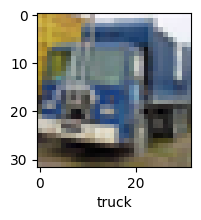

In [45]:
plot_sample(X_test, Y_test, 14)

In [47]:
y_pred = cnn.predict(X_test)
y_pred[:51]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[4.04221518e-03, 8.68107774e-04, 1.30346557e-03, 8.93442154e-01,
        1.38929361e-04, 2.66439356e-02, 4.19352166e-02, 2.61581299e-05,
        2.46404540e-02, 6.95927534e-03],
       [1.74820069e-02, 3.22076539e-03, 3.69307782e-06, 3.48918752e-06,
        1.17542243e-06, 6.07633197e-08, 2.85090316e-08, 5.44518389e-06,
        9.78657067e-01, 6.26248191e-04],
       [1.00414092e-02, 2.89206505e-01, 1.68613275e-04, 2.54532183e-03,
        3.62271385e-04, 7.40658492e-04, 1.22082900e-04, 5.22011425e-04,
        1.73253641e-01, 5.23037493e-01],
       [9.82061505e-01, 3.37755773e-03, 5.15772495e-03, 1.43312558e-04,
        8.38878856e-04, 2.87232183e-06, 1.08453341e-05, 6.09207018e-06,
        7.56772980e-03, 8.33507220e-04],
       [6.32709714e-07, 2.23110692e-06, 8.93173926e-03, 1.09413022e-03,
        9.13148880e-01, 9.71331974e-05, 7.67211020e-02, 2.91550373e-06,
        8.22305367e-07, 3.13451295e-07],
       [1.24945960e-04, 9.79108518e-05, 9.16763442e-04, 1.15457708e-02,
   

In [49]:
np.argmax([1, 13, 5, 7, 2, 9, 11])

1

In [56]:
np.argmax(y_pred[1])

8

In [52]:
y_class = [np.argmax(element) for element in y_pred]

In [60]:
y_class [:5]

[3, 8, 9, 0, 4]

In [61]:
Y_test [:5]

array([3, 8, 8, 0, 6], dtype=uint8)